# Part I: Working with Time Series Data

I choose Amazon that trades on the Nasdaq.Its ticker symbol is AMZN.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
AMZN=pd.read_csv('/Users/luoyayuan/Desktop/AMZN.csv',index_col='Date',parse_dates=True)
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-22,3371.679932,3372.870117,3301.449951,3309.040039,3309.040039,2580600
2021-04-23,3319.100098,3375.000000,3308.500000,3340.879883,3340.879883,3192800
2021-04-26,3348.000000,3428.449951,3330.939941,3409.000000,3409.000000,4880700
2021-04-27,3443.469971,3460.000000,3398.010010,3417.429932,3417.429932,3827100
2021-04-28,3434.800049,3489.879883,3425.000000,3458.500000,3458.500000,4631900


In [3]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-04-22 to 2022-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


This dataset is indexed by time values. As we can see in the first several rows of the dataset, the index is organized by date.

In [4]:
print(AMZN.index.max())
print(AMZN.index.min())
print(AMZN.index.argmax())
print(AMZN.index.argmin())

2022-04-21 00:00:00
2021-04-22 00:00:00
252
0


index.max returns the maximum values of the index

index.min returns the minimum values of the index

index.argmax returns the indices of the maximum values along an axis

index.argmin returns the indices of the minimum values along an axis

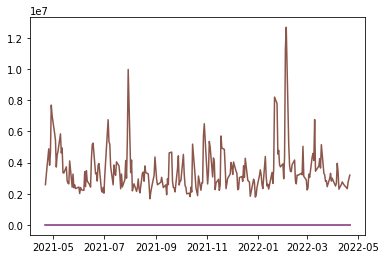

In [5]:
plt.plot(AMZN);

This graph shows the changing trend from 2021-04 to 2022-04. It is challenging to interpret because it's hard to tell what the y-axis represents.  All the data is crammed together.We need to define what we want to show changing with the time and give them labels to audiences.

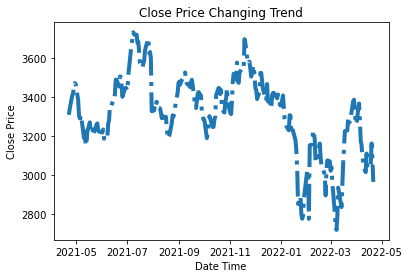

In [17]:
plt.plot(AMZN.Close);
plt.title('Close Price Changing Trend');
plt.xlabel('Date Time');
plt.ylabel('Close Price');

This graph shows the close prices' date time changing trend.It is easier to interpret because the y-axis represents close price and it's more specific. 

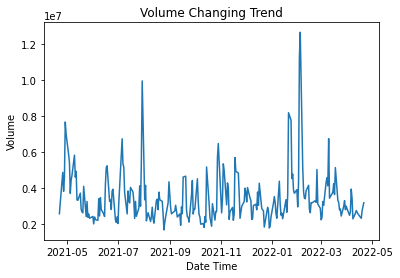

In [7]:
plt.plot(AMZN.Volume);
plt.title('Volume Changing Trend');
plt.xlabel('Date Time');
plt.ylabel('Volume');

This graph shows the volume' date time changing trend.There is no seasonality nor stability. We can tell that there are two peaks respectively in 2021-08 and 2022-02 generating high trading amount. 

### Plotting a subset of your data

#### i. Using a slice operation, plot the daily ‘Close’ variable from your dataset for any one-month period of your choice.

#### ii. Now, show the plot you drew with the previous step, but with a new figsize, line color, and style.

In [8]:
AMZN_JAN=AMZN.loc['2022-01-01':'2022-01-31','Close']
AMZN_JAN=pd.DataFrame(AMZN_JAN)
AMZN_JAN

,Close
Date,
2022-01-03,3408.090088
2022-01-04,3350.439941
2022-01-05,3287.139893
2022-01-06,3265.080078
2022-01-07,3251.080078
2022-01-10,3229.719971
2022-01-11,3307.239990
2022-01-12,3304.139893
2022-01-13,3224.280029


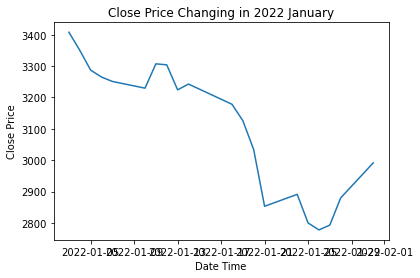

In [9]:
plt.plot(AMZN_JAN);
plt.title('Close Price Changing in 2022 January');
plt.xlabel('Date Time');
plt.ylabel('Close Price');

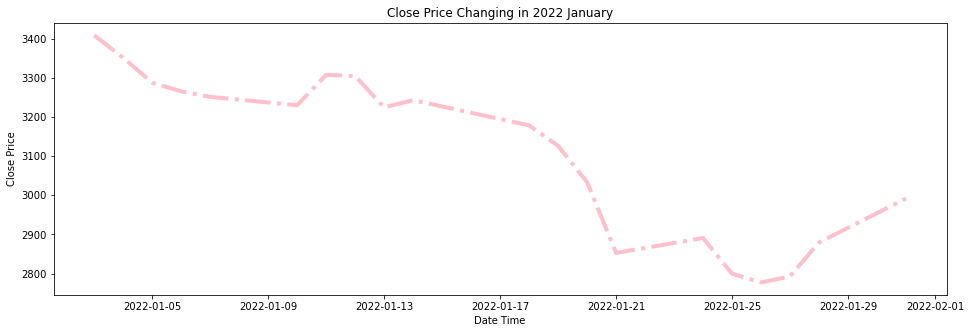

In [10]:
plt.figure(figsize=(16,5))
plt.rc('lines', linewidth=4, linestyle='-.')
plt.plot(AMZN_JAN,color='pink');
plt.title('Close Price Changing in 2022 January');
plt.xlabel('Date Time');
plt.ylabel('Close Price');

The two graphs above show the pictures of the closing price in different size and color. The second one show a more readable graph bacause of larger size.

#### Next, we will try something called resampling.
#### a. Resample your time series so that its values are based on one-month time periods’ mean values, rather than daily periods.

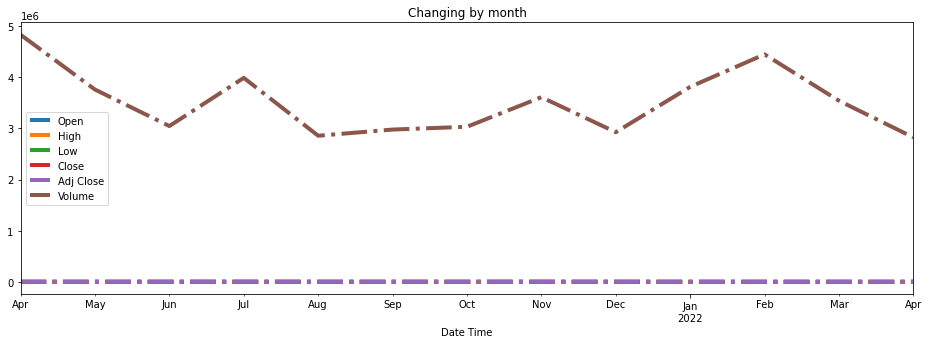

In [18]:
AMZN.resample('M').mean().plot(figsize=(16,5));
plt.title('Changing by month');
plt.xlabel('Date Time');

Resampling involves changing the frequency of our time series observations. Two types of resampling are: Upsampling: Where we increase the frequency of the samples, such as from minutes to seconds. Downsampling: Where we decrease the frequency of the samples, such as from days to months.By resampling we adjusted the measure calculating ranges and we can be more aware of the output. 

For example, A company selling different types of shoes in its chain stores. After first 6 months of sales data, they want to make a mid-year summary. They called previous years' data that only contains the first half of the year since they want to compare within the same time period and this is the downsampling in months. When the company wants to make a strategy respectively in each month to set the targeting reaching goal, we may do upsampling because we want to look at each day's detailed sales outcome in each month.

# Part 2: marketing mix modeling with an interaction term

In [20]:
ads=pd.read_csv('/Users/luoyayuan/Desktop/schwab_ads.csv')
ads.head()

,Web,Bus_Stop,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Web        200 non-null    float64
 1   Bus_Stop   200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
ads1=ads.assign(total_spending=ads.Web+ads.Bus_Stop+ads.Newspaper)
ads1.head()

,Web,Bus_Stop,Newspaper,Sales,total_spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [29]:
ads1['total_spending'].corr(ads1['Sales'])

0.9249170062499313

The correlation of total spending and sales is 0.92,which shows a high correlated relationship.

In [39]:
ads2=ads1.iloc[:,0:3]
ads2.corr()

,Web,Bus_Stop,Newspaper
Web,1.000000,0.054809,0.056648
Bus_Stop,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


These three variables are not highly correlated, thus it will not cause big problems when creating models.

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [42]:
model=ols(formula='Sales~Web+Bus_Stop+Newspaper',data=ads)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           8.13e-99
Time:                        15:37:37   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
Web            0.0544      0.001     39.592      0.000       0.052       0.057
Bus_Stop       0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of the F-Statistic for this model is 8.13e-99, which suggests this model is reasonable.

The p-values for Web and Bus_Stop are 0.000 and the p-value of Newspaper is 0.954, which suggests this parameter has a small effect in this model and is not suitable as a valid parameter.

In [43]:
model2=ols(formula='Sales~Web+Bus_Stop+Web:Bus_Stop',data=ads)
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          3.90e-104
Time:                        15:40:55   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.1926      0.410     15.101      0.000       5.384       7.001
Web              0.0436      0.002     17.512      0.000       0.039       0.048
Bus_Stop         0.0423      0.015      2.869      0.005       0.013       0.071
Web:Bus_Stop     0.0004   8.67e-05      5.110      0.000       0.000       0.001
==============================================================================
Omnibus:                        8.006   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.847
Skew:                          -0.258   Prob(JB):                      0.00441
Kurtosis:                       4.017   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-values for each of these predictors are very low, all lower than 0.05. This is a more reasonable model.

#### Demonstrate what your model would predict for a marketer using 100 units of web ad spending and 100 units of bus stop ad spending. What sales outcome should this marketer expect to see?

In [44]:
sales=6.1926+0.0436*100+0.0423*100+0.0004*100*100
sales

18.7826

Using 100 units of web ad spending and 100 units of bus stop ad spending, my model will return 18.7826 for sales.

In this model, the coefficient between Bus_Stop and Web is small. This means that the ads at bus stop and the ads on websites could reach different customer group. The interaction between them then is low. Thus spending money on bus stop ads and website ads will affect different groups of customer and worth it to some extent.

#### In a 3-5 sentence paragraph describe what you found (or invented). What are the variables that make up this interaction? Is the effect of their interaction on the outcome positive, or negative? How do you feel about the interaction? Does it make sense to you? Or does it surprise you?

Interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable. If term is statistically significant (associated with a p-value < 0.05), then we can use it.

For example, we want to know about the height of a shrub based on the amount of bacteria in the soil and whether the shrub is located in partial or full sun. The condition of sun and bacteria are independent variables to dependent variable of height.One possibility is that in full sun plants with more bacteria in the soil tend to be taller. But in partial sun plants with more bacteria in the soil are shorter. Another is that plants with more bacteria in the soil tend to be taller in both full and partial sun. But the relationship is much more dramatic in full than in partial sun. Knowing the interaction helps us consider situations more wisely and fully.